# 선호된 건축년도
- 연도별
- 자치구별

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic')

In [2]:
df = pd.read_csv('seoul_apart3.csv')
df.head()

,지역명,법정동,거래일,평수,층,건축년도,거래금액,평당 가격
0,서울시 종로구,내수동,2018,12.9,15,2004,130000,10077.52
1,서울시 종로구,내수동,2018,9.5,5,2003,96000,10105.26
2,서울시 종로구,내수동,2018,11.3,10,2004,118000,10442.48
3,서울시 종로구,내수동,2018,6.1,13,1994,54500,8934.43
4,서울시 종로구,내수동,2018,7.0,11,1994,64000,9142.86


In [3]:
df.drop(df.loc[df['거래일']==2023].index, inplace=True)

# 데이터 탐색
- 평균 평수는 7평, 최소 0.9평, 최대는 38.8평
- 평균 층수는 9층, 최소 1층, 최고층은 69층
- 건축년도 평균은 1999년, 최소 61년, 최고는 22년
- 평균 거래금액은 6.6억, 최소는 700만원, 최대는 145억
- 평균 평당 가격은 9천만원, 최소는 89만원, 7.5억

In [24]:
df.describe().round(2)

,거래일,평수,층,건축년도,거래금액,평당 가격
count,611925.00,611925.00,611925.00,611925.00,611925.00,611925.00
mean,2017.53,7.14,9.04,1999.65,66335.01,9278.89
std,2.02,2.77,6.11,9.61,51396.40,5328.57
min,2015.00,0.90,1.00,1961.00,700.00,89.74
25%,2016.00,5.50,4.00,1993.00,36000.00,5714.29
50%,2017.00,7.70,8.00,2000.00,52000.00,7692.31
75%,2019.00,7.80,13.00,2006.00,79500.00,11111.11
max,2022.00,38.80,69.00,2022.00,1450000.00,75757.58


In [27]:
df1 = df[['지역명', '거래일', '거래금액', '건축년도', '평당 가격']]
df1.head()

,지역명,거래일,거래금액,건축년도,평당 가격
0,서울시 종로구,2018,130000,2004,10077.52
1,서울시 종로구,2018,96000,2003,10105.26
2,서울시 종로구,2018,118000,2004,10442.48
3,서울시 종로구,2018,54500,1994,8934.43
4,서울시 종로구,2018,64000,1994,9142.86


In [28]:
df1 = df1.copy()
df1.sort_values(by=['거래일', '지역명'])
df1.head()

,지역명,거래일,거래금액,건축년도,평당 가격
0,서울시 종로구,2018,130000,2004,10077.52
1,서울시 종로구,2018,96000,2003,10105.26
2,서울시 종로구,2018,118000,2004,10442.48
3,서울시 종로구,2018,54500,1994,8934.43
4,서울시 종로구,2018,64000,1994,9142.86


# 연도 별 건축년도 분포
- 매년 평균이 98년 ~ 00년도 안에 고르게 분포되어 있음
- 22년에는 평균이 04년도임
- 매년 큰 차이는 없지만, 비슷한 시기 (98 - 01년)에 건설된 아파트를 선호하는 것으로 보임

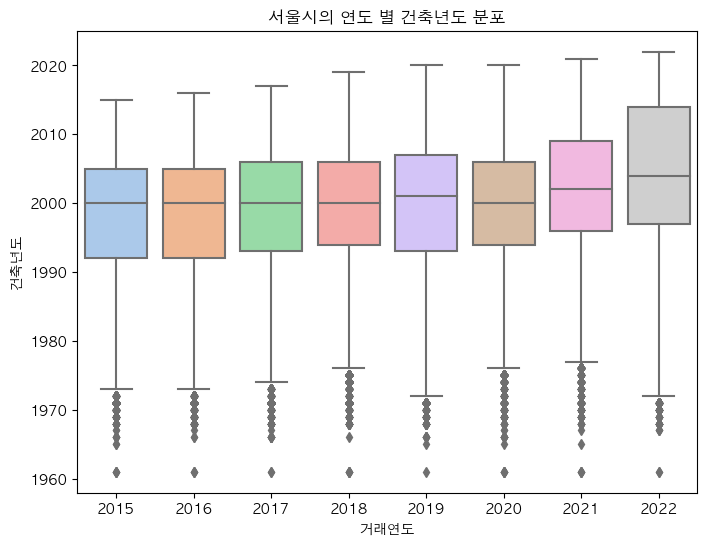

In [29]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='거래일', y='건축년도', data=df1, palette='pastel')
plt.title('서울시의 연도 별 건축년도 분포')
plt.xlabel('거래연도')
plt.ylabel('건축년도')

plt.show()

In [30]:
df2 = df1.groupby(by='거래일').agg({'건축년도' : 'mean'}).round(2).reset_index()
df2

,거래일,건축년도
0,2015,1998.49
1,2016,1998.77
2,2017,1999.16
3,2018,1999.83
4,2019,2000.27
5,2020,2000.38
6,2021,2001.97
7,2022,2004.13


# 자치구 별 건축년도
- 평균 건축년도가 가장 높은 지역은 은평구(05년), 그 다음이 중구(04년)
- 평균 건축년도가 가장 낮은 지역은 노원구(93년), 그 다음이 도봉구(94년)

In [4]:
df3 = df[['지역명', '거래일', '평당 가격', '건축년도']]
df3.head()

,지역명,거래일,평당 가격,건축년도
0,서울시 종로구,2018,10077.52,2004
1,서울시 종로구,2018,10105.26,2003
2,서울시 종로구,2018,10442.48,2004
3,서울시 종로구,2018,8934.43,1994
4,서울시 종로구,2018,9142.86,1994


In [5]:
df3 = df3.groupby('지역명').agg({'건축년도' : 'mean', '평당 가격': 'mean'}).round(2).reset_index()
df3['지역명'] = df3['지역명'].str.replace('서울시', '')
df3

,지역명,건축년도,평당 가격
0,강남구,1996.68,17342.79
1,강동구,1998.77,9311.48
2,강북구,2003.09,6501.84
3,강서구,2000.88,7826.92
4,관악구,2001.10,7249.60
5,광진구,1998.55,10045.00
6,구로구,1999.94,6718.00
7,금천구,2000.65,6275.87
8,노원구,1993.76,6768.82
9,도봉구,1994.60,5779.28


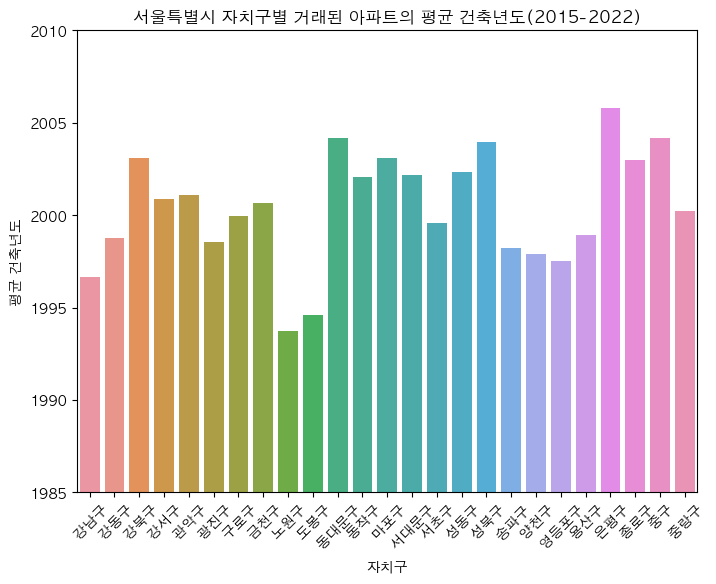

In [99]:
plt.figure(figsize=(8,6))

sns.barplot(x='지역명', y='건축년도', data=df3)
plt.title('서울특별시 자치구별 거래된 아파트의 평균 건축년도(2015-2022)')
plt.xlabel('자치구')
plt.ylabel('평균 건축년도')
plt.ylim(1985, 2010)
plt.xticks(rotation=45)

plt.show()

## 분석
- 아파트의 연식이 오래되었다고 해서 꼭 낮은 값으로 거래가 되는 것은 아닌 것으로 보인다
- 노원구와 도봉구의 아파트들은 건축년도와 평당 가격이 비례하는 모습이지만, 강남구와 송파구, 용산구, 서초구는 오히려 반비례하는 모습을 보였다.
- 은평구도 마찬가지로 평균 건축년도는 가장 최신이지만, 평당 가격은 굉장히 낮은 쪽에 속해있었다.
- 이 두 변수의 상관계수는 0.07로 유의미하지 않다.
- 오히려 지역의 땅값에 영향을 더 받는 것으로 보인다(흔히 말하는 강남3구가 더 높은 추세)

In [84]:
# 상관관계 계산
correlation = df['건축년도'].corr(df['평당 가격']).round(3)
print(f"건축년도와 평당 가격의 상관계수: {correlation}")

건축년도와 평당 가격의 상관계수: 0.071


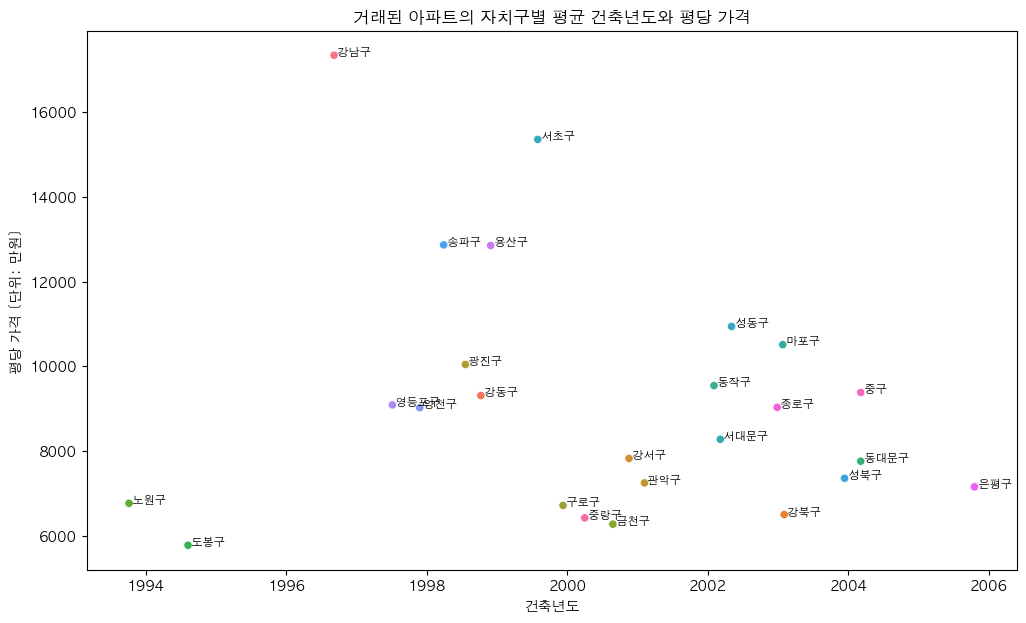

In [6]:
# 지역별 아파트의 평균 건축년도와 평균 평당 가격
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df3['건축년도'], y=df3['평당 가격'], hue=df3['지역명'])


for i, txt in enumerate(df3['지역명']):
    plt.annotate(txt, (df3['건축년도'][i], df3['평당 가격'][i]), fontsize=8)


plt.xlabel('건축년도')
plt.ylabel('평당 가격 [단위: 만원]')
plt.title('거래된 아파트의 자치구별 평균 건축년도와 평당 가격')

plt.legend().set_visible(False)

plt.show()

# 연도에 따른 자치구 별 거래금액

In [9]:
annual_trade = df[['지역명', '거래일', '거래금액']]
yearly_trade = annual_trade.copy()
yearly_trade = yearly_trade.groupby(['지역명','거래일']).agg({'거래금액':'mean'}).reset_index()
yearly_trade.head()

,지역명,거래일,거래금액
0,서울시 강남구,2015,94134.512968
1,서울시 강남구,2016,107776.138707
2,서울시 강남구,2017,127019.619526
3,서울시 강남구,2018,153672.681184
4,서울시 강남구,2019,180095.862592


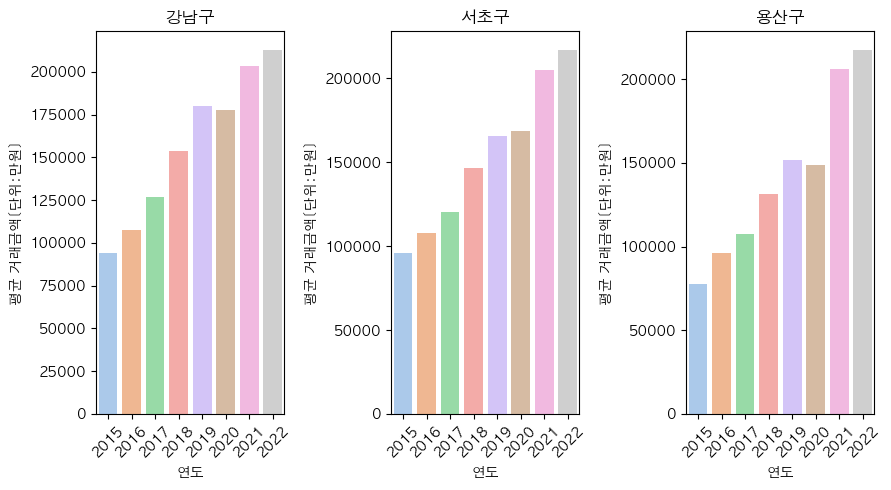

In [10]:
# 거래금액 상위 3개 자치구의 연도별 평균 거래 금액 
x1 = yearly_trade[yearly_trade['지역명'] == '서울시 강남구']['거래일']
y1 = yearly_trade[yearly_trade['지역명'] == '서울시 강남구']['거래금액']

x2 = yearly_trade[yearly_trade['지역명'] == '서울시 서초구']['거래일']
y2 = yearly_trade[yearly_trade['지역명'] == '서울시 서초구']['거래금액']

x3 = yearly_trade[yearly_trade['지역명'] == '서울시 용산구']['거래일']
y3 = yearly_trade[yearly_trade['지역명'] == '서울시 용산구']['거래금액']

fig, ax = plt.subplots(ncols=3, figsize=(9, 5))

sns.barplot(x=x1, y=y1, palette='pastel', ax=ax[0])
ax[0].set_title('강남구')
ax[0].set_xlabel('연도')
ax[0].set_ylabel('평균 거래금액[단위:만원]')
ax[0].set_xticklabels(x1, rotation=45)

sns.barplot(x=x2, y=y2, palette='pastel', ax=ax[1])
ax[1].set_title('서초구')
ax[1].set_xlabel('연도')
ax[1].set_ylabel('평균 거래금액[단위:만원]')
ax[1].set_xticklabels(x2, rotation=45)

sns.barplot(x=x3, y=y3, palette='pastel', ax=ax[2])
ax[2].set_title('용산구')
ax[2].set_xlabel('연도')
ax[2].set_ylabel('평균 거래금액[단위:만원]')
ax[2].set_xticklabels(x3, rotation=45)

plt.tight_layout()
plt.show()